<a href="https://colab.research.google.com/github/darkengross/NLP_Novel_Analysis/blob/main/A_Graders_NLP_Project_round2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

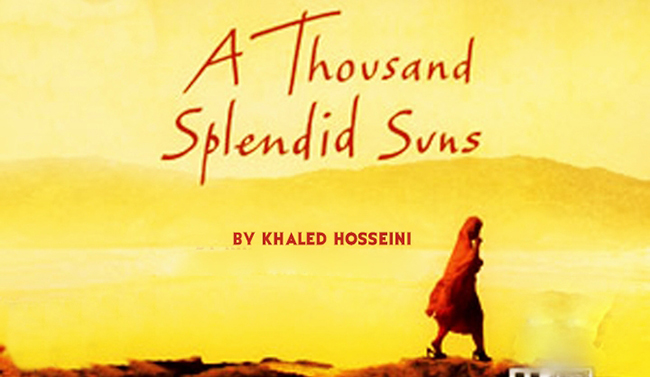

#NLP PROJECT
###Members
- Khushal Goyal : 21ucs109
- Kushal singh  : 21ucs114
- Aanya Jain    : 21ucs250
- Nukul Sharma  : 21ucs253

###Table Of Contents
- Getting Data
- Text cleaning using Reguar expressions
- Data preprocessing (Tokenization, etc...)
- Pos-Tagging using
- bi-gram modelling on chapter 1
- shannon game on chapter 2
- syntactic labelling
- NER

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from collections import Counter

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk import pos_tag


These are the some libraries that will be used as baseline to develop this project. pandas are used for handling data in dataframe, numpy are used for mathematical operations. matplotlib, seaborn are used for data visualization. re is using for handling regular expressions. nltk is used as the primary natural language toolkit that contains a lot of functionalities that will be discussed when it is being used

In [31]:
from google.colab import files
file_path='/content/A Thousand Splendid Suns.txt'
with open(file_path, 'r') as file:
    content = file.read()

print("File Content:")
print(content)


File Content:
A THOUSAND SPLENDID SUNS


1

A THOUSAND SPLENDID SUNS

A THOUSAND SPLENDID SUNS

2

A THOUSAND SPLENDID SUNS

3

4


PART ONE
1.



Mariam was five years old the first time she heard the word harami.

It happened on a Thursday. It must have, because Mariam remembered that she had been
restless and preoccupied that day, the way she was only on Thursdays, the day when Jalil
visited her at the kolba. To pass the time until the moment that she would see him at last,
crossing the knee-high grass in the clearing and waving, Mariam had climbed a chair and
taken down her mother's Chinese tea set. The tea set was the sole relic that Mariam's
mother, Nana, had of her own mother, who had died when Nana was two. Nana cherished
each blue-and-white porcelain piece, the graceful curve of the pot's spout, the hand-painted
finches and chrysanthemums, the dragon on the sugar bowl, meant to ward off evil.
It was this last piece that slipped from Mariam's fingers, that fell to the wooden

In [32]:
print("Length of the book ",len(content))
print("Data type of the content object is",type(content))

Length of the book  589259
Data type of the content object is <class 'str'>


##Text cleaning using Reguar expressions

In [33]:


pattern1 = re.compile(r'A THOUSAND SPLENDID SUNS', re.IGNORECASE)
pattern2 = r'\*{3}'
pattern3 = re.compile(r'AFTERWORD.*', re.DOTALL)

punctuation_pattern = re.compile(r'[^\w\s]')
page_number_pattern = re.compile(r'\b(?:[1-9]|[1-9]\d|1\d{2}|200|2[0-9][0-9]|300)\b')
chinese_pattern = re.compile(r'[\u4e00-\u9fff]+', re.UNICODE)

txt_without_headers = re.sub(pattern1, '', content)
txt_without_page_numbers = re.sub(page_number_pattern, '', txt_without_headers)
txt_without_chinese_characters = re.sub(chinese_pattern, '', txt_without_page_numbers)
filtered_text = re.sub(pattern2, '', txt_without_chinese_characters)

text_without_punctuation = re.sub(pattern3, '', filtered_text)
final_text = re.sub(punctuation_pattern, '', text_without_punctuation)

print("Modified Text:")
print(final_text[:1000])


Modified Text:


















PART ONE




Mariam was five years old the first time she heard the word harami

It happened on a Thursday It must have because Mariam remembered that she had been
restless and preoccupied that day the way she was only on Thursdays the day when Jalil
visited her at the kolba To pass the time until the moment that she would see him at last
crossing the kneehigh grass in the clearing and waving Mariam had climbed a chair and
taken down her mothers Chinese tea set The tea set was the sole relic that Mariams
mother Nana had of her own mother who had died when Nana was two Nana cherished
each blueandwhite porcelain piece the graceful curve of the pots spout the handpainted
finches and chrysanthemums the dragon on the sugar bowl meant to ward off evil
It was this last piece that slipped from Mariams fingers that fell to the wooden floor
boards of the kolba and shattered
When Nana saw the bowl her face flushed red and her upper lip shivered and her eyes
bot

In the code snippit above we have used regular expressions to remove some unwanted data items. These are:
1. The running sections 'A THOUSAND SPLENDID SUNS'
2. There were also some chinese characters that were present in the end of the document
3. Intial introduction about author and related sections and the end disclaimer and related sections which did not hold any symantic value.
4. page numbers.
5. punctuations.


##Data Preprocessing

In [34]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In NLTK, "punkt" is the Punkt tokenizer, an algorithm that utilizes unsupervised machine learning to tokenize text into sentences based on patterns and statistics learned from a large corpus.

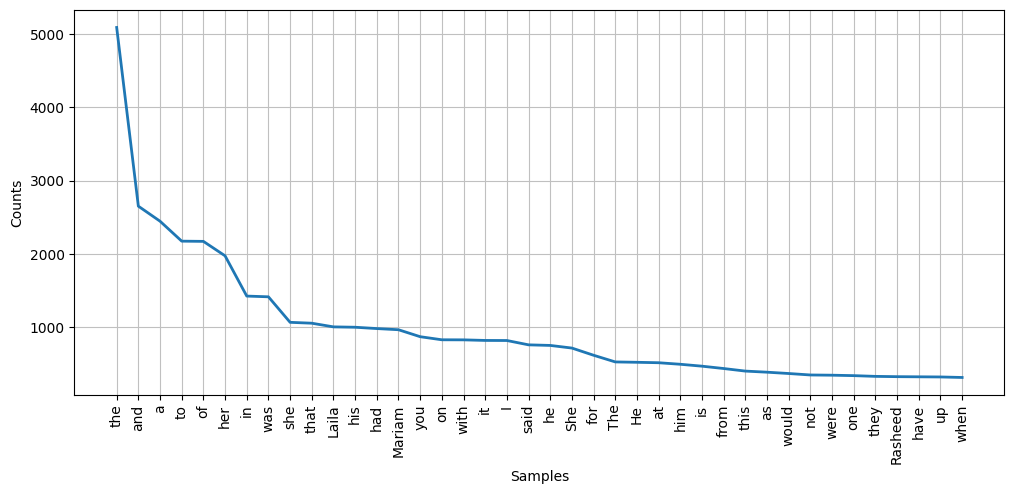

<Axes: xlabel='Samples', ylabel='Counts'>

In [35]:
tokens = word_tokenize(final_text)
freq = nltk.FreqDist(tokens)
plt.figure(figsize=(12,5))
freq.plot(40, cumulative=False)

We tokenized the document using word_tokenize method defined in nltk library. we can also obseve that the a lot of the words are stopwords in the chosen novel.

In [36]:
len(tokens)
# This shows that lot of the values in the data was spaces and punctuatuions

103839

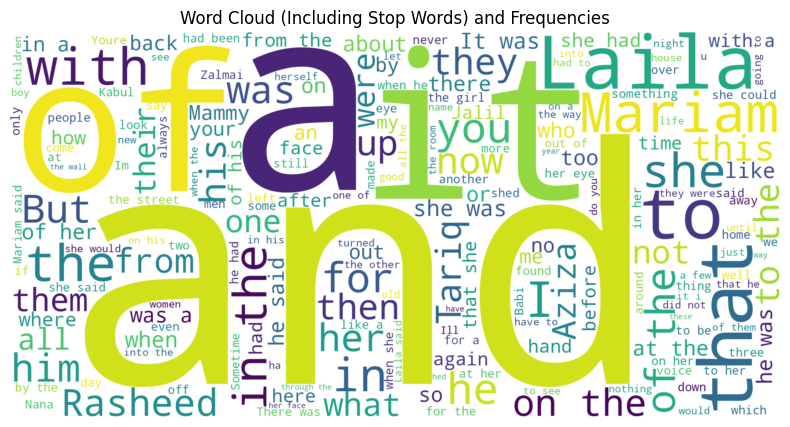

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(tokens)

wordcloud = WordCloud(width=2000, height=1000, background_color='white', stopwords={}).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (Including Stop Words) and Frequencies")
plt.show()


It can be observed from the word cloud that the frequency of the stop words are extremely high.

In [38]:
nltk.download('stopwords')

words = word_tokenize(text)

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

print("Tokenized Text without Stop Words:")
print(filtered_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokenized Text without Stop Words:
['PART', 'ONE', 'Mariam', 'five', 'years', 'old', 'first', 'time', 'heard', 'word', 'harami', 'happened', 'Thursday', 'must', 'Mariam', 'remembered', 'restless', 'preoccupied', 'day', 'way', 'Thursdays', 'day', 'Jalil', 'visited', 'kolba', 'pass', 'time', 'moment', 'would', 'see', 'last', 'crossing', 'kneehigh', 'grass', 'clearing', 'waving', 'Mariam', 'climbed', 'chair', 'taken', 'mothers', 'Chinese', 'tea', 'set', 'tea', 'set', 'sole', 'relic', 'Mariams', 'mother', 'Nana', 'mother', 'died', 'Nana', 'two', 'Nana', 'cherished', 'blueandwhite', 'porcelain', 'piece', 'graceful', 'curve', 'pots', 'spout', 'handpainted', 'finches', 'chrysanthemums', 'dragon', 'sugar', 'bowl', 'meant', 'ward', 'evil', 'last', 'piece', 'slipped', 'Mariams', 'fingers', 'fell', 'wooden', 'floor', 'boards', 'kolba', 'shattered', 'Nana', 'saw', 'bowl', 'face', 'flushed', 'red', 'upper', 'lip', 'shivered', 'eyes', 'lazy', 'one', 'good', 'settled', 'Mariam', 'flat', 'unblinking',

In this code we are using stopwords from nltk library and then looping through our document and at each data point, we are basically checking that is the given word present in the stopword collection. If yes then remove it from our data.

Most common words and their frequencies:
Laila: 1006
Mariam: 967
said: 761
would: 370
one: 341
Rasheed: 327
Tariq: 277
like: 267
back: 261
could: 230
time: 207
see: 197
eyes: 197
Aziza: 185
face: 182
Mammy: 167
room: 162
around: 156
way: 154
saw: 154


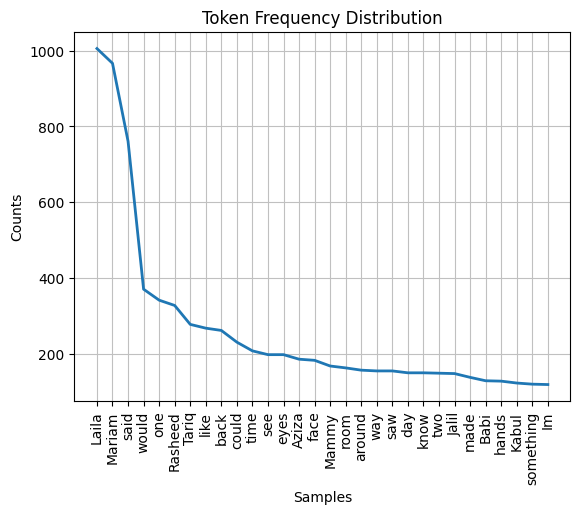

<Axes: title={'center': 'Token Frequency Distribution'}, xlabel='Samples', ylabel='Counts'>

In [39]:
freq_dist = FreqDist(filtered_words)

most_common = freq_dist.most_common(20)
print("Most common words and their frequencies:")
for word, freq in most_common:
    print(f"{word}: {freq}")

plt.title("Token Frequency Distribution")
freq_dist.plot(30, cumulative=False)


After removing the stop words in the previous sections, we are using matplotlib library to map a frequency plot of the words that we have. It can be observed that the word *Laila* and *Mariam* is the two most frequent words. Would this affect our part of speech tagging?? Lets check that in the next section

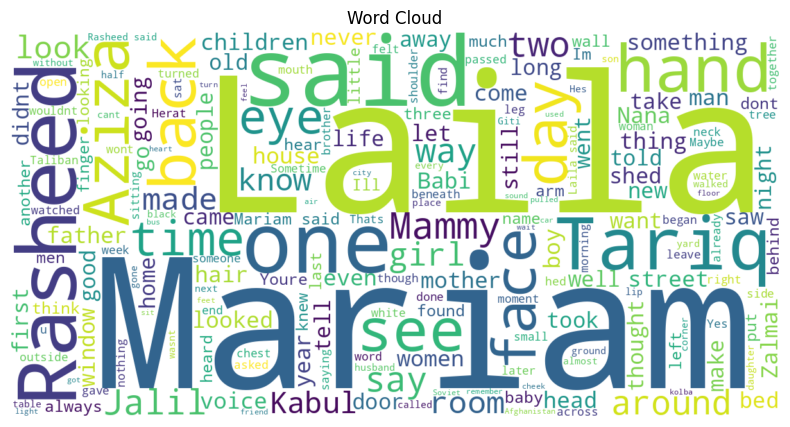

In [40]:
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(" ".join(filtered_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud")
plt.show()

This is the word colud that we get after removing stop words. Looking at it now it becomes clearer than before.

##POS-tagging

In [41]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Average_perceptron_tagger is the most recent part of speach tagger that works on the concept of deep learning algorithms.

In [42]:
pos_tagged_words = pos_tag(filtered_words)
pos_tagged_words[:15]

[('PART', 'NN'),
 ('ONE', 'CD'),
 ('Mariam', 'NNP'),
 ('five', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 ('first', 'JJ'),
 ('time', 'NN'),
 ('heard', 'NN'),
 ('word', 'NN'),
 ('harami', 'NN'),
 ('happened', 'VBD'),
 ('Thursday', 'NNP'),
 ('must', 'MD'),
 ('Mariam', 'NNP')]

In this code we use average perceptron tagger to tag our tokens.

The nltk.tag.AveragedPerceptronTagger is the default tagger as of NLTK version 3.1. The model was trained on on Sections 00-18 of the Wall Street Journal sections of OntoNotes 5

The original implementation comes from Matthew Honnibal, it outperforms the predecessor maximum entropy POS model in NLTK and is based on semi supervised deep learning algorithms

<BarContainer object of 30 artists>

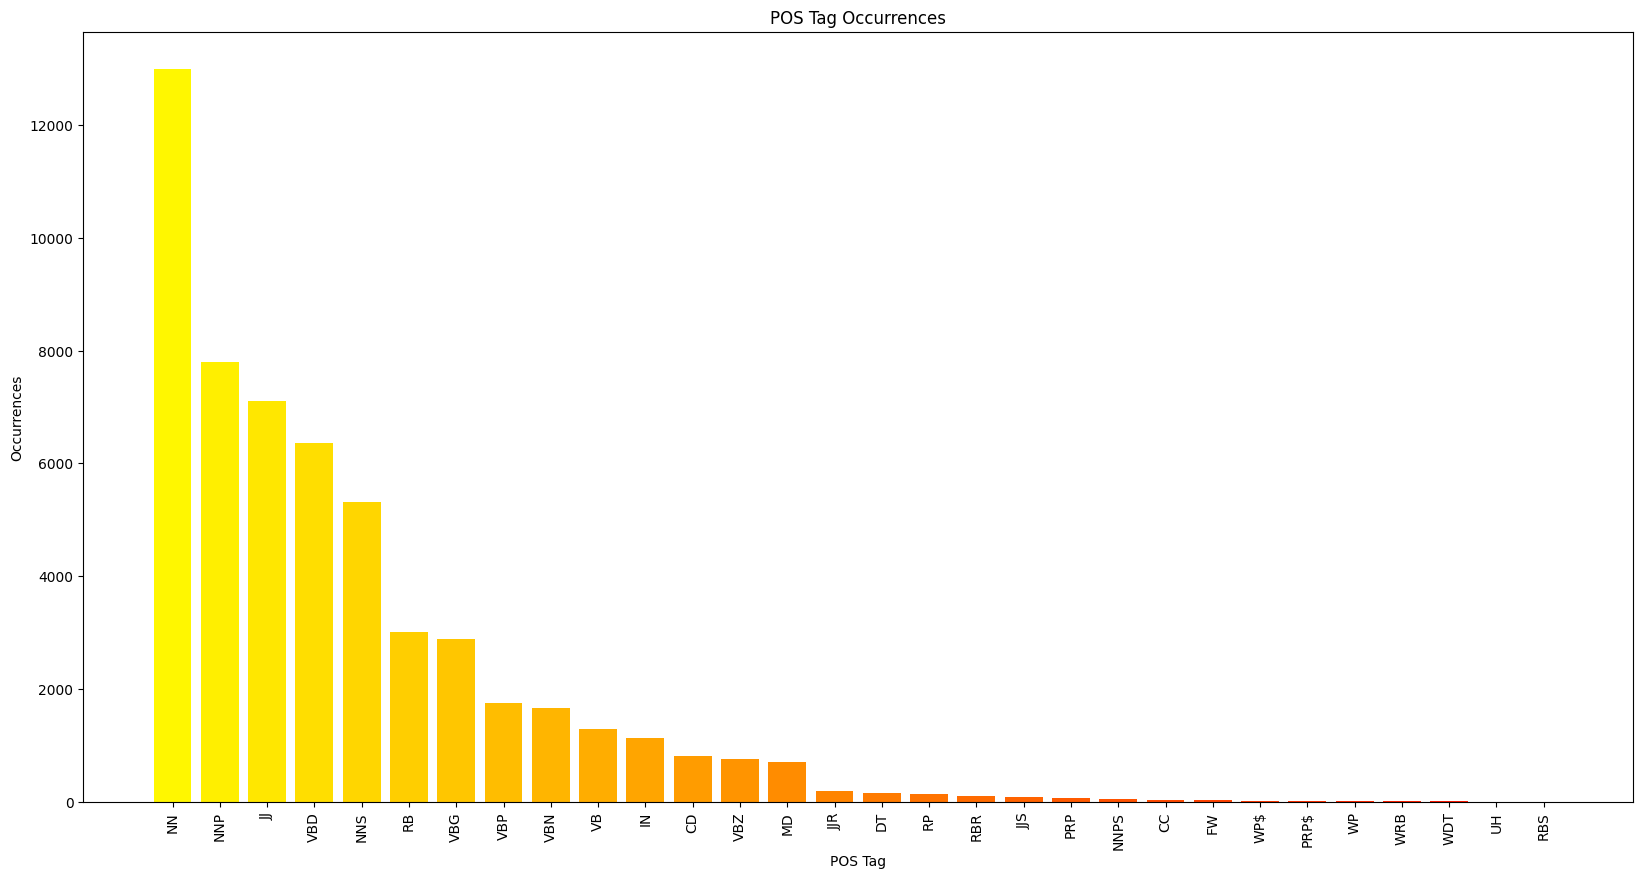

In [43]:
tag_counts = Counter(tag for word, tag in pos_tagged_words)

tags, counts = zip(*sorted(tag_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(20, 10))
plt.xlabel('POS Tag')
plt.ylabel('Occurrences')
plt.title('POS Tag Occurrences')
plt.xticks(rotation=90)
plt.bar(tags, counts, color=sns.color_palette("autumn_r",len(tags)))


This plot quietly answers the question that we asked in the last section. Since we have a large number of  *Laila* and *Mariam* which in most cases would be tagged as a NN. So the tag category NN is most frequent in our scenario.

##Bi-gram modelling


In [44]:
start_index = tokens.index('ONE') + 1
end_index = tokens.index('PART', start_index)

selected_words = tokens[start_index:end_index]

selected_words[:15]

['Mariam',
 'was',
 'five',
 'years',
 'old',
 'the',
 'first',
 'time',
 'she',
 'heard',
 'the',
 'word',
 'harami',
 'It',
 'happened']

In this code we use slicing method to find all the words between chapter 1 and 2

In [45]:
len(selected_words)

26100

shows the length of the chapter 1

In [46]:
Chapter1to2 = selected_words

In [47]:
from nltk.util import bigrams

As the name suggest bigram is used to deal with bigram models and it is imported form nltk.utils. It work on the principle of frequency counting

importing bigram model

In [48]:
bi_grams = list(bigrams(Chapter1to2))

finding bigrmas of the word in chapter 1

In [49]:
bigrams_frequency = nltk.FreqDist(bi_grams)

finding frequency distribution of the words in chapter 1

In [50]:
cfd = nltk.ConditionalFreqDist(bi_grams)

finding conditional probability distribution of words in chapter 1

In [51]:
unique_words = list(set(word for bigram in bigrams_frequency for word in bigram))
bigram_matrix = pd.DataFrame(0, columns=unique_words, index=unique_words, dtype=float)
word_freq = nltk.FreqDist(Chapter1to2)
bigram_probabilities = {}

for word1 in unique_words:
    for word2 in unique_words:
        conditional_freq = cfd[word1][word2]
        first_word_count = word_freq[word1]
        probability = float(conditional_freq)/(first_word_count)
        bigram_probabilities[word1, word2] = probability
        bigram_matrix.at[word1, word2] = probability


bigram_matrix = bigram_matrix.fillna(0)


print(bigram_matrix)

             crinkled  reward  shown  classroom  guest  poplars  tiny  richly  \
crinkled          0.0     0.0    0.0        0.0    0.0      0.0   0.0     0.0   
reward            0.0     0.0    0.0        0.0    0.0      0.0   0.0     0.0   
shown             0.0     0.0    0.0        0.0    0.0      0.0   0.0     0.0   
classroom         0.0     0.0    0.0        0.0    0.0      0.0   0.0     0.0   
guest             0.0     0.0    0.0        0.0    0.0      0.0   0.0     0.0   
...               ...     ...    ...        ...    ...      ...   ...     ...   
drawstring        0.0     0.0    0.0        0.0    0.0      0.0   0.0     0.0   
murder            0.0     0.0    0.0        0.0    0.0      0.0   0.0     0.0   
missed            0.0     0.0    0.0        0.0    0.0      0.0   0.0     0.0   
fragments         0.0     0.0    0.0        0.0    0.0      0.0   0.0     0.0   
temperament       0.0     0.0    0.0        0.0    0.0      0.0   0.0     0.0   

             signing  get  

making a bigram matrix to find the probabilty value of each word

In [28]:
top_ten_bigrams = sorted(bigram_probabilities.items(), key=lambda x: x[1], reverse=True)[:15]


print("Top fifteen Bigrams with Maximum Probability:")
for bigram, probability in top_ten_bigrams:
    word1, word2 = bigram
    print(f"{word1} -> {word2}: Probability = {probability:.4f}")


Top fifteen Bigrams with Maximum Probability:
reward -> for: Probability = 1.0000
shown -> her: Probability = 1.0000
guest -> room: Probability = 1.0000
poplars -> and: Probability = 1.0000
richly -> colored: Probability = 1.0000
signing -> of: Probability = 1.0000
dogs -> and: Probability = 1.0000
rosebud -> lips: Probability = 1.0000
itOh -> Oh: Probability = 1.0000
stupid -> girl: Probability = 1.0000
Right -> now: Probability = 1.0000
link -> her: Probability = 1.0000
dreadful -> men: Probability = 1.0000
abasement -> of: Probability = 1.0000
pounce -> on: Probability = 1.0000


finding the top 15 words with the highest probabilty

##Shannon's Game

In [53]:
bigram_probabilities

{('crinkled', 'crinkled'): 0.0,
 ('crinkled', 'reward'): 0.0,
 ('crinkled', 'shown'): 0.0,
 ('crinkled', 'classroom'): 0.0,
 ('crinkled', 'guest'): 0.0,
 ('crinkled', 'poplars'): 0.0,
 ('crinkled', 'tiny'): 0.0,
 ('crinkled', 'richly'): 0.0,
 ('crinkled', 'signing'): 0.0,
 ('crinkled', 'get'): 0.0,
 ('crinkled', 'people'): 0.0,
 ('crinkled', 'dogs'): 0.0,
 ('crinkled', 'excitement'): 0.0,
 ('crinkled', 'rosebud'): 0.0,
 ('crinkled', 'itOh'): 0.0,
 ('crinkled', 'Where'): 0.0,
 ('crinkled', 'door'): 0.0,
 ('crinkled', 'stupid'): 0.0,
 ('crinkled', 'Right'): 0.0,
 ('crinkled', 'orchards'): 0.0,
 ('crinkled', 'You'): 0.0,
 ('crinkled', 'cabinet'): 0.0,
 ('crinkled', 'battle'): 0.0,
 ('crinkled', 'link'): 0.0,
 ('crinkled', 'dreadful'): 0.0,
 ('crinkled', 'garis'): 0.0,
 ('crinkled', 'shrugged'): 0.0,
 ('crinkled', 'abasement'): 0.0,
 ('crinkled', 'pounce'): 0.0,
 ('crinkled', 'carver'): 0.0,
 ('crinkled', 'dark'): 0.0,
 ('crinkled', 'hed'): 0.0,
 ('crinkled', 'fours'): 0.0,
 ('crinkled', '

we will be using this probability distribution that we obtained from the chapter 1 and will use this to play shannon's game in chapter 2

In [54]:
def make_guess(previous_word, bigram_probabilities):
    later_probabilities = {word: prob for (prev, word), prob in bigram_probabilities.items() if prev == previous_word}
    optimal_guesses = sorted(later_probabilities, key=later_probabilities.get, reverse=True)
    return optimal_guesses

This is a function called make_guess that will take a word and bigram probabilities and based on the probabilities, it will ouput a list of most probable word that will occur after the previous_word

In [55]:
def play_shannons_game(existing_string, bigram_probabilities):
        s=""
        print("Welcome to Shannon's Game!")
        print("Think of a word, and I will try to guess it based on the provided string.")
        print("Please respond with 'yes' or 'no' to my guesses.")
        print("You can end the game by typing 'exit'.")
        previous_word = input("Think of a starting word: ")
        print(f"Starting word: {previous_word}")
        s=s+" "+previous_word
        while True:
              guesses = make_guess(previous_word, bigram_probabilities)
              for guess in guesses:
                  response = input(f"Is it '{guess}'? (yes/no): ")
                  if response == 'yes':
                      previous_word = guess
                      s=s+" "+guess
                      print(f"Sentence: {s}")
                      break
                  elif response=='no':
                      continue
                  elif response == 'exit':
                      print("Thanks for playing!")
                      return
                  else:
                      print("No more guesses. Thanks for playing!")
                      return


This here is the main functions that will play the shanon game. It will take a string that will be the first word and will fill the words according to the probabilities found.

In [56]:
start_index = tokens.index('TWO') + 1
end_index = tokens.index('PART', start_index)

chapter2to3 = tokens[start_index:end_index]

chapter2to3[:15]

['Kabul',
 'Spring',
 '1987',
 'Nine',
 'year',
 'old',
 'Laila',
 'rose',
 'from',
 'bed',
 'as',
 'she',
 'did',
 'most',
 'mornings']

Same code as before, however this code will be used to find the words between chapter 2 and 3

In [ ]:
play_shannons_game(chapter2to3, bigram_probabilities)

Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: nine
Starting word: nine
Is it 'children'? (yes/no): no
Is it 'legitimate'? (yes/no): no
Is it 'year'? (yes/no): yes
Sentence:  nine year
Is it 'Mariam'? (yes/no): no
Is it 'old'? (yes/no): yes
Sentence:  nine year old
Is it 'man'? (yes/no): no
Is it 'and'? (yes/no): no
Is it 'enough'? (yes/no): no
Is it 'bicycle'? (yes/no): no
Is it 'citadel'? (yes/no): no
Is it 'We'? (yes/no): no
Is it 'patterns'? (yes/no): no
Is it 'girls'? (yes/no): yes
Sentence:  nine year old girls
Is it 'her'? (yes/no): 
No more guesses. Thanks for playing!


The original sentence was "nine year old girls." and we were able to predict it in a toatal of 13 guesses. so total right words were 4 and total words were 13 hence the probability is 4/13


##Sytactic labelling

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

WordNet is a lexical database of the English language that has been used in various natural language processing (NLP) and artificial intelligence (AI) applications. In NLTK (Natural Language Toolkit), WordNet is a large lexical database that provides a semantic network of words and their relationships.

features of WordNet in NLTK are:

- Synsets (Synonym Sets): WordNet groups words into sets of synonyms called synsets. Each synset represents a distinct concept and includes a set of words that are considered synonymous in that context.

- Hypernyms and Hyponyms: WordNet organizes words into hierarchies. A hypernym is a more general term, while a hyponym is a more specific term. For example, in the hierarchy, "animal" is a hypernym of "dog," and "dog" is a hyponym of "animal."

- Antonyms: WordNet also includes information about antonyms, providing words that have opposite meanings.

- Part-Whole Relationships: WordNet captures part-whole relationships between concepts. For example, in the hierarchy, "car" is part of the whole concept "vehicle."

Lemmas and Word Forms: WordNet provides lemmas (base forms) for words and information about their different word forms.

In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
words, pos_tags = zip(*pos_tagged_words)

nouns = []
verbs = []

for word, pos_tag in pos_tagged_words:
    if pos_tag.startswith('N'):
        nouns.append(word)
    elif pos_tag.startswith('V'):
        verbs.append(word)

print("Nouns:", nouns)
print("Verbs:", verbs)

Nouns: ['PART', 'Mariam', 'years', 'time', 'heard', 'word', 'harami', 'Thursday', 'Mariam', 'day', 'way', 'Thursdays', 'day', 'Jalil', 'pass', 'time', 'moment', 'grass', 'Mariam', 'chair', 'mothers', 'tea', 'tea', 'Mariams', 'mother', 'Nana', 'mother', 'Nana', 'Nana', 'piece', 'curve', 'pots', 'finches', 'chrysanthemums', 'sugar', 'bowl', 'piece', 'Mariams', 'fingers', 'floor', 'boards', 'Nana', 'face', 'lip', 'eyes', 'good', 'Mariam', 'way', 'Nana', 'Mariam', 'jinn', 'mothers', 'time', 'Nana', 'Mariam', 'wrists', 'teeth', 'reward', 'everything', 'Ive', 'time', 'Mariam', 'understand', 'word', 'haramibastardmeant', 'injustice', 'creators', 'harami', 'sin', 'Mariam', 'way', 'Nana', 'word', 'thing', 'harami', 'insect', 'cockroaches', 'Nana', 'kolba', 'Later', 'Mariam', 'way', 'Nana', 'word', 'Mariam', 'Nana', 'meant', 'harami', 'thing', 'Mariam', 'illegitimate', 'person', 'claim', 'things', 'people', 'things', 'family', 'home', 'acceptance', 'Jalil', 'Mariam', 'name', 'Jalil', 'fond', 'st

This is a simple logic block that seperate all the nouns and verbs from out tagged words.

In [ ]:
def synset(words):
    categories=[]
    for word in words:
        cat=[]
        for synset in wn.synsets(word):
            if('noun' in synset.lexname()):
                cat.append(synset.lexname())
            if ('verb' in synset.lexname()):
                cat.append(synset.lexname())
        categories.append(cat)
    return categories

In [ ]:
def all_synsets (no,ve):
    nouns=[]
    verbs=[]
    for word in no:
        for synset in wn.synsets (word):
            if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
                nouns.append(synset.lexname())
            if('verb' in synset.lexname()):
                verbs.append(synset.lexname())
    for word in ve:
        for synset in wn.synsets (word):
            if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
                nouns.append(synset.lexname())
            if('verb' in synset.lexname()):
                verbs.append(synset.lexname())

    return nouns, verbs

This function all_synsets() take two parameter that is "no" list that contain all words that are noun and "ve" a list that contains all the verbs. Then the two seperate for loops check the lexical name for all the nouns and verbs respectively. It also checks that the category is not "Tops"(filterd out)

In [ ]:
noun_syntax,verb_syntax=all_synsets(nouns, verbs)

In [ ]:
noun_syntax[:20]

['noun.relation',
 'noun.artifact',
 'noun.object',
 'noun.cognition',
 'noun.location',
 'noun.act',
 'noun.cognition',
 'noun.possession',
 'noun.cognition',
 'noun.body',
 'noun.communication',
 'noun.act',
 'noun.time',
 'noun.time',
 'noun.time',
 'noun.time',
 'noun.time',
 'noun.time',
 'noun.group',
 'noun.event']

In [ ]:
verb_syntax[:20]

['verb.motion',
 'verb.social',
 'verb.motion',
 'verb.contact',
 'verb.contact',
 'verb.change',
 'verb.cognition',
 'verb.cognition',
 'verb.change',
 'verb.change',
 'verb.perception',
 'verb.cognition',
 'verb.social',
 'verb.perception',
 'verb.perception',
 'verb.communication',
 'verb.motion',
 'verb.motion',
 'verb.social',
 'verb.motion']

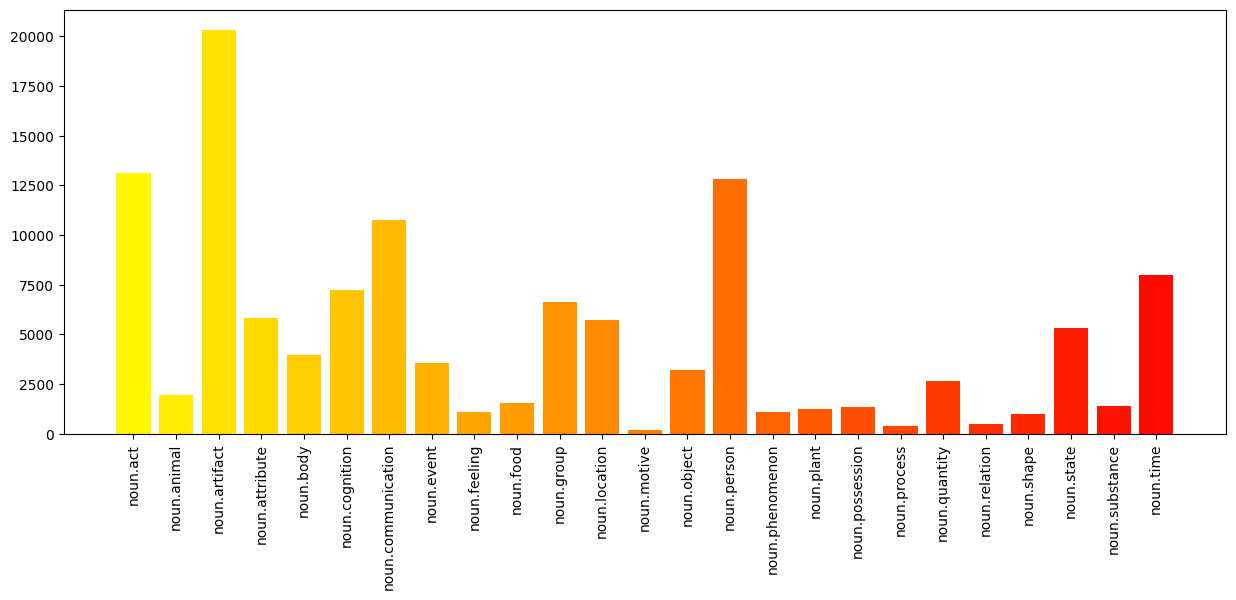

In [ ]:
labels_n, counts_n= np.unique (noun_syntax, return_counts=True)
ticks =range(len(counts_n))
plt.figure(figsize=(15,8))
plt.bar(labels_n, counts_n, align='center',color=sns.color_palette("autumn_r",len(labels_n)))
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom = 0.35)
plt.show()

Visualization of the different types of nouns on the basis of their frequencies. It can be observed that the noun.artifact occurs most frequently.

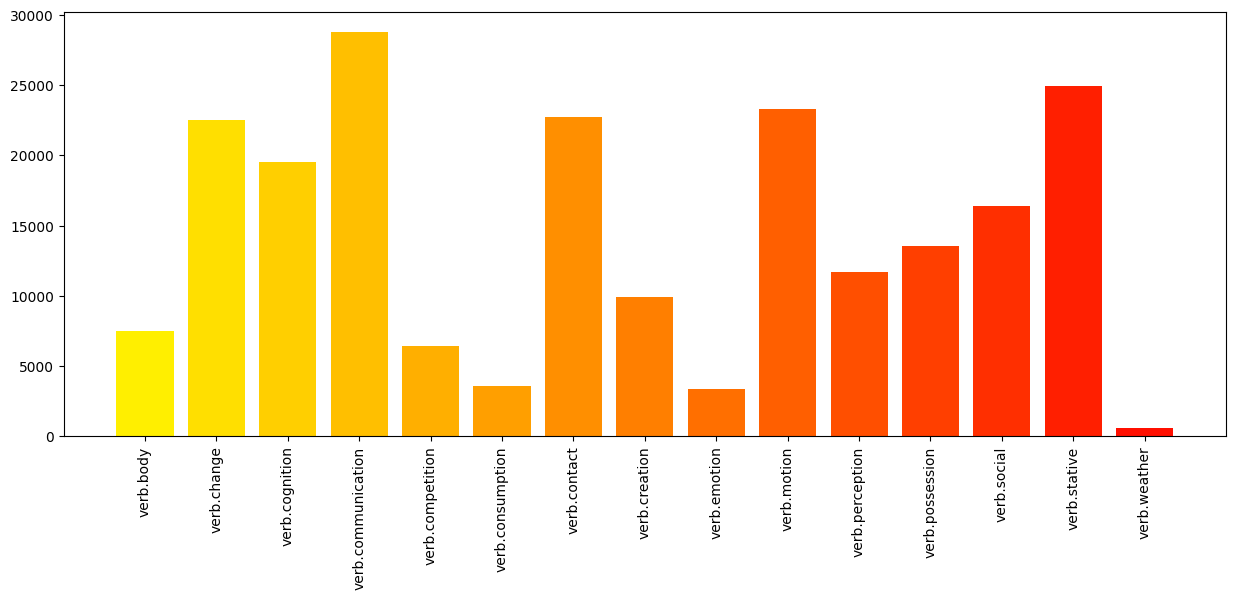

In [ ]:
labels_v, counts_v = np.unique (verb_syn, return_counts=True)
ticks1 =range(len(counts_v))
plt.figure(figsize=(15,8))
plt.bar(labels_v, counts_v, align='center',color=sns.color_palette("autumn_r",len(labels_v)))
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom = 0.35)
plt.show()

##Name Entity Recognition

In [ ]:
%pip install -U spacy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.


spaCy is an open-source natural language processing (NLP) library for Python. We will be using spacy for the Name Entity recognition package in it.

In [ ]:
!python -m spacy download en_core_web_sm

2023-12-17 07:10:29.450735: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 07:10:29.450810: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 07:10:29.451658: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-17 07:10:29.456590: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-17 07:10:30.585736: W tensorflow/compiler/tf2

In [ ]:
import spacy
from spacy import displacy
from collections import Counter

In [ ]:
text_for_ner = " ".join(filtered_words)

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc1 = nlp(text_for_ner[:10000])
print(f"{len(doc1.ents)} entities exists in the book ")


218 entities exists in the book 


In [ ]:
def entity_tagger(text):
  doc = nlp(text)
  words = []
  for X in doc:
    words.append({X.text, X.ent_type})
  return words

In [ ]:
ner_tagged = entity_tagger(text_for_ner[:100])
ner_tagged

[{0, 'PART'},
 {0, 'ONE'},
 {380, 'Mariam'},
 {391, 'five'},
 {391, 'years'},
 {391, 'old'},
 {396, 'first'},
 {0, 'time'},
 {0, 'heard'},
 {0, 'word'},
 {0, 'harami'},
 {0, 'happened'},
 {391, 'Thursday'},
 {0, 'must'},
 {380, 'Mariam'},
 {0, 'remembered'}]

In [ ]:
def entity_recognition(text):
    doc=nlp(text)
    person=[]
    org=[]
    location=[]
    vehicle=[]
    for X in doc:
        if (X.ent_type_ == 'PERSON') and X.text not in person:
            person.append(X.text)
        if (X.ent_type_=='ORG') and X.text not in org:
            org.append(X.text)
        if ((X.ent_type_ =='LOC') or (X.ent_type_== 'CPE')) and X.text not in location:
            location.append(X.text)
        if(X.ent_type_=='VEH' and X.text not in vehicle):
            vehicle.append(X.text)
    return person, org, location, vehicle

In [ ]:
persons, organisations, locations, vehicles = entity_recognition(text_for_ner[:50000])
print(f"Number of \"person\" entities in book = {str(len(persons))}")
print(f"Number of \"organization\" entities in book = {str(len(organisations))}")
print(f"Number of \"location\" entities in book = {str(len(locations))}")
print(f"Number of \"vehicles\" entities in book = {str(len(vehicles))}")

Number of "person" entities in book = 105
Number of "organization" entities in book = 56
Number of "location" entities in book = 4
Number of "vehicles" entities in book = 0


In [ ]:

def freq(str_list):
    unique_words =set(str_list)
    counts= {}
    for words in unique_words :
        counts[words]= str_list.count(words)
    return counts

This function is a simple implementation of word frequency counting rather than a specific name entity recognition (NER) function. It takes a list of strings (str_list) as input, and it aims to count the frequency of each unique word in the list.

In [ ]:

X = freq(persons)
print(sorted(X.items(), key= lambda kv: (kv[1], kv[0]), reverse=True))

[('three', 1), ('sultan', 1), ('spring', 1), ('spinach', 1), ('slung', 1), ('sabzi', 1), ('rice', 1), ('one', 1), ('old', 1), ('night', 1), ('nayMullah', 1), ('murder', 1), ('mullah', 1), ('mule', 1), ('kolba', 1), ('kissed', 1), ('kerosene', 1), ('kebab', 1), ('jo', 1), ('jinn', 1), ('jan', 1), ('jacket', 1), ('ishiop', 1), ('gaunt', 1), ('garis', 1), ('drawn', 1), ('cauliflower', 1), ('buried', 1), ('brought', 1), ('bread', 1), ('Zahir', 1), ('Women', 1), ('Whose', 1), ('Tuesdays', 1), ('Try', 1), ('Together', 1), ('Tajik', 1), ('Sufis', 1), ('Stories', 1), ('Sometimes', 1), ('Slipped', 1), ('Shir', 1), ('Shahs', 1), ('Shah', 1), ('Roadmaster', 1), ('Rasheed', 1), ('Ramin', 1), ('Pangs', 1), ('Niloufar', 1), ('Nargis', 1), ('Nanas', 1), ('Nana', 1), ('Mullah', 1), ('Muhsin', 1), ('Mils', 1), ('Mazang', 1), ('Mariams', 1), ('Mariam', 1), ('Look', 1), ('Learn', 1), ('Khans', 1), ('Khan', 1), ('Khadija', 1), ('Karokh', 1), ('Kabuls', 1), ('Jami', 1), ('Jalils', 1), ('Jalil', 1), ('Ill',

In [ ]:
selText1= "It happened on a Thursday. It must have, because Mariam remembered that she had been restless and preoccupied that day, the way she was only on Thursdays, the day when Jali visited her at the kolba"
selText2="It was the way Nana uttered the word not so much saying it as spitting it at her that made Mariam feel the full sting of it. She understood then what Nana meant, that a harami was an unwanted thing; that she, Mariam, was an illegitimate person who would never have legitimate claim to the things other people had, things such as love, family, home, acceptance. Jalil never called Mariam this name."

In [ ]:
selLabel1=['O', 'O', 'O','O', 'GPE','O', 'O', 'O', 'O','O', 'O', 'PERSON', 'O', 'O', 'O','O', 'O', 'O','O', 'O','O', 'O','O', 'O', 'O','O', 'O', 'O','O', 'GPE','O', 'O', 'O', 'O', 'PERSON', 'O', 'O', 'O', 'O', 'GPE']
setLabel2 = ['O', 'O', 'O','O', 'PERSON', 'O', 'O','O', 'O', 'O', 'O','O', 'O', 'O', 'O','O', 'O', 'O', 'O','PERSON', 'O', 'O', 'O','O', 'O', 'O', 'O','O', 'O', 'O', 'O','PERSON', 'O', 'O', 'O','O', 'OTHER', 'O', 'O','O', 'O', 'O', 'O','O', 'O', 'PERSON', 'O','O', 'O', 'O', 'O','O', 'O', 'O', 'O','O', 'O', 'O', 'O','O', 'O', 'O', 'O','O', 'O', 'O', 'O','O', 'O', 'O', 'O','O', 'O', 'O', 'O','O', 'PERSON', 'O', 'O','PERSON', 'O', 'O', 'O']

In [ ]:
print(len(word_tokenize(selText1)))
print(len(selLabel1))
print(len(word_tokenize(selText2)))
print(len(setLabel2))

40
40
83
83


In [ ]:
doc1 = nlp(selText1)
predLabel1= [word.ent_type_ for word in doc1]

In [ ]:
print(len(selLabel1))
print(len(predLabel1))
print(predLabel1)


40
40
['', '', '', '', 'DATE', '', '', '', '', '', '', 'PERSON', '', '', '', '', '', '', '', '', 'DATE', 'DATE', '', '', '', '', '', '', '', 'DATE', '', 'DATE', 'DATE', '', 'PERSON', '', '', '', '', '']


In [ ]:
doc2 = nlp(selText2)
predLabel2= [word.ent_type_ for word in doc2]

In [ ]:
print(len(selLabel2))
print(len(predLabel2))
print(predLabel2)

83
83
['', '', '', '', 'ORG', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'PERSON', '', '', '', '', '', '', '', '', '', '', '', 'ORG', '', '', '', '', '', '', '', '', '', '', '', '', '', 'PERSON', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'PERSON', '', '', 'PERSON', '', '', '']


In [ ]:
predLabelFinal1 = predLabel1.copy()
for x in range(len(predLabel1)):
    if (predLabel1[x]=='') or (predLabel1[x] not in ['ORG', 'WORK_OF_ART', 'MONEY', 'PERSON', 'CARDINAL']):
        predLabelFinal1[x] = 'O'

In [ ]:
print(predLabelFinal1)

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'PERSON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'PERSON', 'O', 'O', 'O', 'O', 'O']


In [ ]:
predLabelFinal2 = predLabel2.copy()
for x in range(len(predLabel2)):
    if (predLabel2[x]=='') or (predLabel2[x] not in ['ORG', 'WORK_OF_ART', 'MONEY', 'PERSON', 'CARDINAL']):
        predLabelFinal2[x] = 'O'

In [ ]:

print(predLabelFinal2)

['O', 'O', 'O', 'O', 'ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'PERSON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'PERSON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'PERSON', 'O', 'O', 'PERSON', 'O', 'O', 'O']


In [ ]:
confusionMatrix = {"TP":0, "TN":0, "FP":0, "FN":0}
for i, trueLabel in enumerate(selLabel1):
  if ((trueLabel == 'O') and (predLabelFinal1[i] == trueLabel)):
    confusionMatrix["TN"] += 1
  if ((trueLabel == 'O') and (predLabelFinal1[i] != 'O') and (predLabelFinal1[i] != trueLabel)):
    confusionMatrix["FP"] += 1
  if ((trueLabel != 'O') and (predLabelFinal1[i] == trueLabel)):
    confusionMatrix["TP"] += 1
  if ((trueLabel != 'O') and (predLabelFinal1[i] == 'O')) or ((trueLabel != 'O') and (predLabelFinal1[i] != 'O') and (predLabelFinal1[i] != trueLabel)):
    confusionMatrix["FN"] += 1

In [ ]:
print(confusionMatrix)

{'TP': 2, 'TN': 35, 'FP': 0, 'FN': 3}


In [ ]:
accuracy = (confusionMatrix["TP"]+confusionMatrix["TN"])/(confusionMatrix["TP"]+confusionMatrix["TN"]+confusionMatrix["FP"]+confusionMatrix["FN"])
recall = (confusionMatrix["TP"])/(confusionMatrix["TP"]+confusionMatrix["FN"])
precission = (confusionMatrix["TP"])/(confusionMatrix["TP"]+confusionMatrix["FP"])
f1_score = (2*recall*precission)/(recall+precission)


In [ ]:
print(accuracy)
print(recall)
print(precission)
print(f1_score)


0.925
0.4
1.0
0.5714285714285715


**Inference:** It can be deduced that the data is skewed. We have a lot on the negetive data and few instances on positive data. Hence, the accuracy is 0.925 but f1 score is 0.57. This is mainly because we have 3FN when overall true values are 5.

##TF-IDF

In [78]:
start_index = tokens.index('ONE') + 1
end_index = tokens.index('PART', start_index)

first_chapter = tokens[start_index:end_index]
first_chap_para = " ".join(first_chapter)

In [79]:
start_index = tokens.index('TWO') + 1
end_index = tokens.index('PART', start_index)

second_chapter = tokens[start_index:end_index]

second_chap_para = " ".join(second_chapter)

In [80]:
start_index = tokens.index('THREE') + 1
end_index = tokens.index('PART', start_index)

Third_chapter = tokens[start_index:end_index]

third_chap_para = " ".join(Third_chapter)

In [81]:
start_index = tokens.index('FOUR') + 1

Fourth_chapter = tokens[start_index:]

fourth_chap_para = " ".join(Fourth_chapter)

 we have taken all the four chapter and have stored them in four variables

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

we are importing tfidfvectorizer that has been implemented in sklearn.feature_extraction. This model is used to do vectorization. We are also using cosine similarity that has been implemented in sklearn.metrices

In [86]:
documents = [first_chap_para, second_chap_para, third_chap_para, fourth_chap_para]

In [88]:
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

In [89]:
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [95]:
print(tfidf_matrix.shape)
print(similarity_matrix.shape)

(4, 9626)
(4, 4)


In [90]:
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

print("\nCosine Similarity Matrix:")
print(similarity_matrix)

TF-IDF Matrix:
[[0.         0.00079319 0.00158638 ... 0.         0.00062536 0.00079319]
 [0.00101347 0.         0.         ... 0.         0.00159806 0.        ]
 [0.         0.         0.         ... 0.00098899 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

Cosine Similarity Matrix:
[[1.         0.93522176 0.97552154 0.90398009]
 [0.93522176 1.         0.96565585 0.92716531]
 [0.97552154 0.96565585 1.         0.93227263]
 [0.90398009 0.92716531 0.93227263 1.        ]]


It can be seen from the cosine similarity matrix that chapter 1 and chapter 3 have high similarity